In [31]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats

1. Importar un csv (2 puntos): Importe el set de datos creados por usted al final de la
sesión pasada.

In [15]:
df_sample = pd.read_csv("subsample_am_demo.csv")

In [16]:
df = pd.read_csv("qog_std_cs_jan18.csv")

2. Importar su conjunto de funciones (2 puntos). Para ello deberás:
● Generar un archivo ancilliary_funcs.py para guardar las funciones creadas
en la sesión pasada e importe.
● Utilizar las funciones creadas para inspeccionar la cantidad de casos perdidos
de la muestra importada

In [17]:
from ancilliary_funcs import fetch_descriptives
from ancilliary_funcs import fetch_null_cases
from ancilliary_funcs import plot_histograma
from ancilliary_funcs import dotplot

In [18]:
 fetch_descriptives(df_sample)

count     97.000000
mean      95.711340
std       58.971384
min        0.000000
25%       43.000000
50%       95.000000
75%      146.000000
max      192.000000
Name: Unnamed: 0, dtype: float64
count                       97
unique                      97
top       United Arab Emirates
freq                         1
Name: cname, dtype: object
count      97
unique     97
top       ARE
freq        1
Name: ccodealp, dtype: object
count                97
unique               10
top       SouthEastAsia
freq                 24
Name: ht_region, dtype: object
count        97.000000
mean      13588.708153
std       16873.853282
min         324.160000
25%        2113.060100
50%        7259.520000
75%       18310.811000
max      104049.440000
Name: gle_cgdpc, dtype: float64
count    93.000000
mean      0.694677
std       0.157557
min       0.351000
25%       0.555000
50%       0.723000
75%       0.823000
max       0.948000
Name: undp_hdi, dtype: float64
count     71.000000
mean      32.661929
std 

In [19]:
for i in df_sample.columns:
    fetch_null_cases(df_sample, i, print_list=False)


Casos perdidos para Unnamed: 0:
Cantidad de Casos: 0
Porcentaje de la muestra 0.0

Casos perdidos para cname:
Cantidad de Casos: 0
Porcentaje de la muestra 0.0

Casos perdidos para ccodealp:
Cantidad de Casos: 0
Porcentaje de la muestra 0.0

Casos perdidos para ht_region:
Cantidad de Casos: 0
Porcentaje de la muestra 0.0

Casos perdidos para gle_cgdpc:
Cantidad de Casos: 0
Porcentaje de la muestra 0.0

Casos perdidos para undp_hdi:
Cantidad de Casos: 4
Porcentaje de la muestra 4.123711340206185

Casos perdidos para imf_pop:
Cantidad de Casos: 26
Porcentaje de la muestra 26.804123711340207

Casos perdidos para ffp_hf:
Cantidad de Casos: 7
Porcentaje de la muestra 7.216494845360824

Casos perdidos para wef_qes:
Cantidad de Casos: 23
Porcentaje de la muestra 23.711340206185564

Casos perdidos para wdi_expedu:
Cantidad de Casos: 27
Porcentaje de la muestra 27.835051546391753

Casos perdidos para wdi_ners:
Cantidad de Casos: 29
Porcentaje de la muestra 29.896907216494846

Casos perdidos pa

In [20]:
for i in ['wdi_ners', 'wdi_expedu', 'wef_qes']:
    fetch_null_cases(df_sample, i, print_list=True)

United Arab Emirates
Senegal
Solomon Islands
Congo
Angola
Turkmenistan
Mongolia
Botswana
Nicaragua
Montenegro
Congo, Democratic Republic
Kiribati
Cambodia
Singapore
Russia
Djibouti
Somalia
Papua New Guinea
Austria
Liberia
Libya
Tanzania
Czech Republic
Uganda
Togo
Nigeria
Sierra Leone
Bosnia and Herzegovina
Tunisia

Casos perdidos para wdi_ners:
Cantidad de Casos: 29
Porcentaje de la muestra 29.896907216494846
Países sin registros de wdi_ners

United Arab Emirates
Egypt
Solomon Islands
Marshall Islands
Congo
Angola
Botswana
Nicaragua
Montenegro
Kiribati
Tuvalu
Djibouti
Dominican Republic
Somalia
Tonga
Papua New Guinea
Korea, North
Libya
Yemen
Dominica
Grenada
Uzbekistan
Nigeria
Bosnia and Herzegovina
Saudi Arabia
Lesotho
Greece

Casos perdidos para wdi_expedu:
Cantidad de Casos: 27
Porcentaje de la muestra 27.835051546391753
Países sin registros de wdi_expedu

Afghanistan
Solomon Islands
Marshall Islands
Congo
Turkmenistan
St Kitts and Nevis
Kiribati
Tuvalu
Belarus
Djibouti
Somalia
To

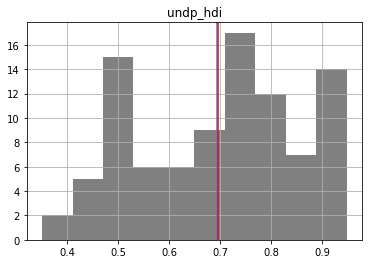

In [21]:
plot_histograma(df_sample,'undp_hdi', df, media_df_peque=True, media_df_total=True)

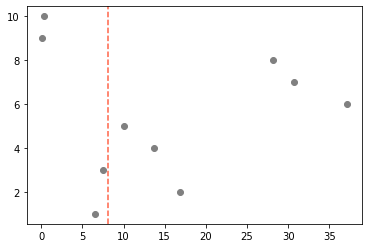

In [9]:
dotplot(df, plot_var='imf_pop', plot_by='ht_region',global_stat=True, statistic='median')

3. Estimar el puntaje Z de una variable (2 puntos): Se debe utilizar la que posea la
menor cantidad de datos perdidos (o que no posea).
● Generar una nueva columna en la tabla de datos que contenga el puntaje Z de
dicha variable. Recuerde que para calcular el puntaje z de una observación se
utiliza la fórmula: 𝑧𝑖 = ( 𝑥𝑖 − 𝑥 ) / σ (𝑥)
● Para ordenar los valores pueden utilizar la función sort_values del DataFrame
analizado. Lean la documentación asociada al argumento by.
● Asegúrense de eliminar las observaciones que tengan valores perdidos con
dropna. Lean la documentación asociada al argumento subset.
● Seleccionen las primeras y últimas 10 observaciones de la base reordenada.
¿Qué características en común se encuentran?

In [22]:
df_sample['z']=(df_sample['gle_cgdpc']-df_sample['gle_cgdpc'].mean())/df_sample['gle_cgdpc'].std()

In [23]:
df_sample=df_sample.sort_values(by='gle_cgdpc').dropna(subset=['gle_cgdpc'])

In [24]:
df_sample.head(10)

,Unnamed: 0,cname,ccodealp,ht_region,gle_cgdpc,undp_hdi,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,flagnull,z
27,41,"Congo, Democratic Republic",COD,SouthEastAsia,324.16000,0.425,NaN,7.1,2.957447,2.24535,NaN,False,-0.786101
61,52,El Salvador,SLV,SubSaharian,332.26999,0.678,NaN,6.9,3.804579,3.44857,70.171722,False,-0.785620
47,97,Liberia,LBR,SouthEastAsia,488.26999,0.427,NaN,6.6,3.472222,2.75756,NaN,False,-0.776375
50,125,Niger,NER,SouthEastAsia,644.53998,0.351,NaN,6.9,NaN,6.70941,15.665040,True,-0.767114
40,26,Burundi,BDI,SouthEastAsia,663.57001,0.406,NaN,6.8,2.595249,5.41642,24.948179,False,-0.765986
37,103,Malawi,MWI,SouthEastAsia,938.34998,0.473,17.604,8.1,3.185532,4.84254,32.942291,False,-0.749702
46,39,Comoros,COM,SouthEastAsia,972.35999,0.498,0.776,7.8,NaN,4.86862,43.934471,True,-0.747686
81,154,Sierra Leone,SLE,SouthEastAsia,979.95001,0.431,6.232,8.4,2.986086,2.66167,NaN,False,-0.747236
68,70,Guinea,GIN,SouthEastAsia,993.83002,0.414,11.745,7.2,2.425785,3.20817,31.788179,False,-0.746414
74,172,Togo,TGO,SouthEastAsia,1036.28000,0.484,6.929,7.3,NaN,4.86846,NaN,True,-0.743898


4. Estimar el puntaje z de las regiones (2 puntos). Utilizando el resultado anterior,
visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).
● Para ello realice un dotplot que muestre el valor promedio de su variable por
cada región.
● Agregue además una línea que muestre el promedio total de la variable (es
decir, antes de agrupar).

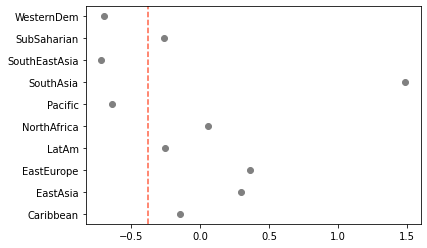

In [25]:
dotplot(df_sample, plot_var='z', plot_by='ht_region',global_stat=True, statistic='median')

5. Generar curvas de Densidad de Probabilidad (2 puntos).
● Cree una función que permita visualizar las curvas de Densidad de Probabilidad
para las variables imf_pop, gle_cgdpc y wdi_exph.
● La función debe contener como argumentos:
○ df: Tabla de datos 1.
○ variable: Variable a contrastar.

In [54]:
def plot_histo(dataframe,valor):
    temporal = dataframe[valor].dropna()
    xs = np.linspace(dataframe[valor].min(),dataframe[valor].max(),100)
    yx = stats.norm.pdf(xs, loc = dataframe[valor].mean(), scale = dataframe[valor].std())
    plt.hist(dataframe[valor],density = True, label = 'Diameter Data')
    plt.plot(xs,yx, label = 'Normal Dist')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

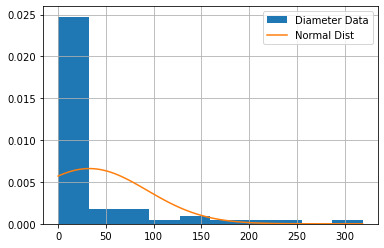

In [55]:
plot_histo(df_sample,'imf_pop')

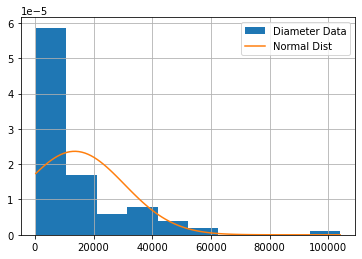

In [56]:
plot_histo(df_sample,'gle_cgdpc')

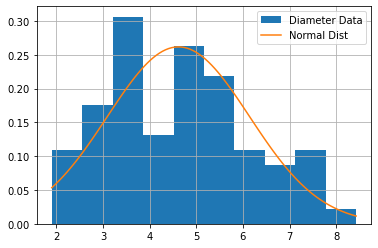

In [59]:
plot_histo(df_sample,'wdi_expedu')

Se cambio la variables wdi_exph por wdi_expedu, ya que esta no estaba en el set que se generaba por apellido de A -> M. Se deja una visualizacion del Dataframe.

In [58]:
df_sample

,Unnamed: 0,cname,ccodealp,ht_region,gle_cgdpc,undp_hdi,imf_pop,ffp_hf,wef_qes,wdi_expedu,wdi_ners,flagnull,z
27,41,"Congo, Democratic Republic",COD,SouthEastAsia,324.16000,0.425,NaN,7.1,2.957447,2.24535,NaN,False,-0.786101
61,52,El Salvador,SLV,SubSaharian,332.26999,0.678,NaN,6.9,3.804579,3.44857,70.171722,False,-0.785620
47,97,Liberia,LBR,SouthEastAsia,488.26999,0.427,NaN,6.6,3.472222,2.75756,NaN,False,-0.776375
50,125,Niger,NER,SouthEastAsia,644.53998,0.351,NaN,6.9,NaN,6.70941,15.665040,True,-0.767114
40,26,Burundi,BDI,SouthEastAsia,663.57001,0.406,NaN,6.8,2.595249,5.41642,24.948179,False,-0.765986
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,80,Ireland,IRL,SouthAsia,46422.07000,0.920,4.621000,2.8,5.434197,5.32457,99.573357,False,1.945813
25,186,United States,USA,SouthAsia,47769.69900,0.918,318.789001,1.5,4.564571,5.38078,90.462288,False,2.025678
35,155,Singapore,SGP,LatAm,54268.14800,0.924,5.470000,3.3,5.797279,2.91579,NaN,False,2.410797
2,127,Norway,NOR,SouthAsia,57634.77000,0.948,5.156000,1.6,5.048264,7.37329,95.201927,False,2.610314
